<a href="https://colab.research.google.com/github/MuhammadMirafuddin17/PRIVATE/blob/main/Augmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install imgaug albumentations opencv-python matplotlib

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import albumentations as A
from google.colab import files
from PIL import Image
from io import BytesIO
import os
import random

In [25]:
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
image = Image.open(BytesIO(uploaded[image_name]))
image = np.array(image)

Saving contoh1.jpg to contoh1 (2).jpg


In [26]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with 50% probability
    iaa.Affine(rotate=(-25, 25)),  # Rotate between -25 to 25 degrees
    iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian Blur
    iaa.AdditiveGaussianNoise(scale=(10, 60)),  # Add noise
    iaa.Multiply((0.5, 1.5)),  # Change brightness
])

In [27]:
albumentations_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=25, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(p=0.2),
    A.GaussNoise(p=0.3)
])

In [28]:
output_dir = "augmented_images"
os.makedirs(output_dir, exist_ok=True)

In [29]:
for i in range(10):
    augmented_img_imgaug = seq(image=image)
    augmented_img_albumentations = albumentations_transform(image=image)['image']

    cv2.imwrite(os.path.join(output_dir, f"augmented_imgaug_{i}.jpg"), cv2.cvtColor(augmented_img_imgaug, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(output_dir, f"augmented_albumentations_{i}.jpg"), cv2.cvtColor(augmented_img_albumentations, cv2.COLOR_RGB2BGR))

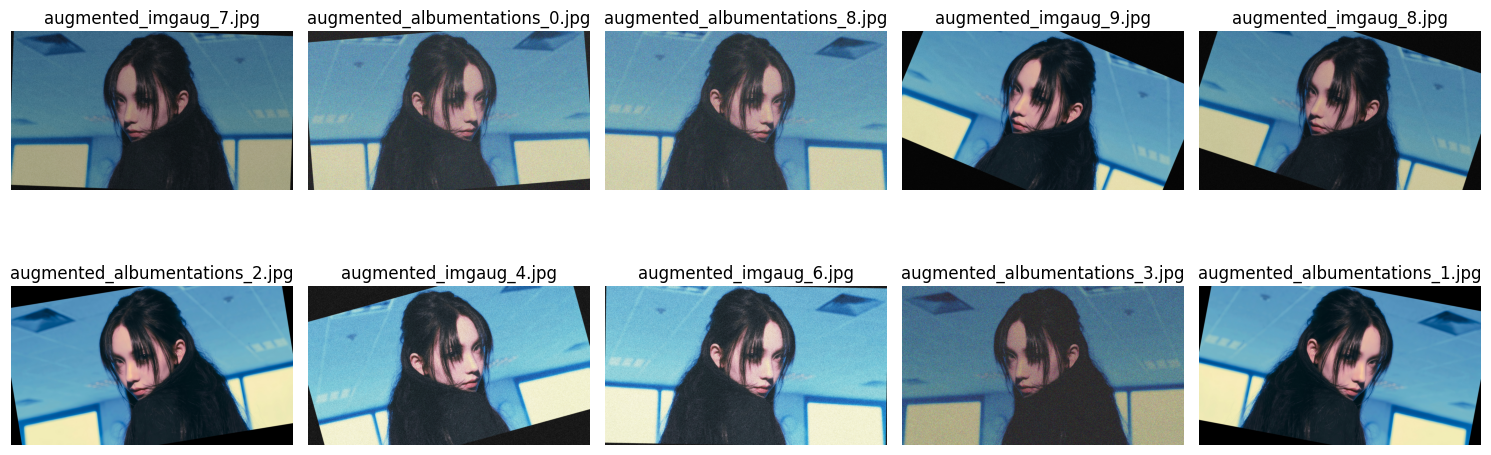

Augmented images saved in 'augmented_images' directory.


In [30]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
augmented_files = os.listdir(output_dir)
random_samples = random.sample(augmented_files, 10)  # Pick 10 random images

for ax, img_name in zip(axes.flat, random_samples):
    img_path = os.path.join(output_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format

    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

print(f"Augmented images saved in '{output_dir}' directory.")